# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import textwrap
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


In [3]:
# cities = cities[:5]
# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# # Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
#         time.wait(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | skjervoy
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | kahului
Processing Record 12 of Set 1 | shelbyville
Processing Record 13 of Set 1 | ambo
Processing Record 14 of Set 1 | sitka
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | zacualtipan
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | bayir
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | tidore
City not found. S

Processing Record 36 of Set 4 | bluefields
Processing Record 37 of Set 4 | babusnica
Processing Record 38 of Set 4 | aklavik
Processing Record 39 of Set 4 | pangnirtung
Processing Record 40 of Set 4 | wilmington
Processing Record 41 of Set 4 | mildura
Processing Record 42 of Set 4 | guajara-mirim
City not found. Skipping...
Processing Record 43 of Set 4 | mogadishu
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | chapais
Processing Record 47 of Set 4 | auki
Processing Record 48 of Set 4 | yavaros
Processing Record 49 of Set 4 | kyle of lochalsh
City not found. Skipping...
Processing Record 0 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 1 of Set 5 | te anau
Processing Record 2 of Set 5 | havelock
Processing Record 3 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 4 of Set 5 | shingu
Processing Record 5 of Set 5 | oussouye
Processing Record 6 of Set 5 | hirara
Processing Record 7 of

Processing Record 24 of Set 8 | itupiranga
Processing Record 25 of Set 8 | hualmay
Processing Record 26 of Set 8 | thunder bay
Processing Record 27 of Set 8 | ukiah
Processing Record 28 of Set 8 | karratha
Processing Record 29 of Set 8 | brae
Processing Record 30 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 31 of Set 8 | quatre cocos
Processing Record 32 of Set 8 | dubuque
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | ulladulla
Processing Record 35 of Set 8 | pacifica
Processing Record 36 of Set 8 | bogale
Processing Record 37 of Set 8 | hamilton
Processing Record 38 of Set 8 | souillac
Processing Record 39 of Set 8 | egvekinot
Processing Record 40 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 41 of Set 8 | comodoro rivadavia
Processing Record 42 of Set 8 | marrakesh
Processing Record 43 of Set 8 | kleck
City not found. Skipping...
Processing Record 44 of Set 8 | eureka
Processing Record 45 of Set 8 | bara
Processing R

Processing Record 10 of Set 12 | kentau
Processing Record 11 of Set 12 | riviere-au-renard
Processing Record 12 of Set 12 | melfi
Processing Record 13 of Set 12 | shepsi
Processing Record 14 of Set 12 | goryachiy klyuch
Processing Record 15 of Set 12 | kununurra
Processing Record 16 of Set 12 | gat
Processing Record 17 of Set 12 | wageningen
Processing Record 18 of Set 12 | lagoa
Processing Record 19 of Set 12 | san andres
Processing Record 20 of Set 12 | biak
Processing Record 21 of Set 12 | ternate
Processing Record 22 of Set 12 | porto velho
Processing Record 23 of Set 12 | maarianhamina
Processing Record 24 of Set 12 | saint-paul
Processing Record 25 of Set 12 | gambela
Processing Record 26 of Set 12 | frome
Processing Record 27 of Set 12 | vila franca do campo
Processing Record 28 of Set 12 | nisia floresta
Processing Record 29 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 12 | praia da vitoria
Processing Record 31 of Set 12 | iwanai
Processing Rec

In [11]:
len(city_data)

568

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,64.27,67,20,10.36,ZA,1668881895
1,hilo,19.7297,-155.0900,78.24,89,75,3.44,US,1668882061
2,hithadhoo,-0.6000,73.0833,80.85,79,25,9.37,MV,1668882061
3,esperance,-33.8667,121.9000,57.11,73,47,16.80,AU,1668882062
4,hermanus,-34.4187,19.2345,61.81,75,1,6.49,ZA,1668882062


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,64.27,67,20,10.36,ZA,1668881895
1,hilo,19.7297,-155.0900,78.24,89,75,3.44,US,1668882061
2,hithadhoo,-0.6000,73.0833,80.85,79,25,9.37,MV,1668882061
3,esperance,-33.8667,121.9000,57.11,73,47,16.80,AU,1668882062
4,hermanus,-34.4187,19.2345,61.81,75,1,6.49,ZA,1668882062


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

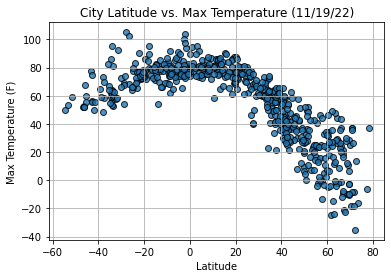

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

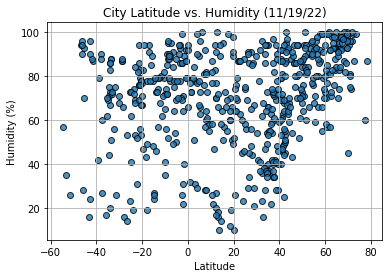

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

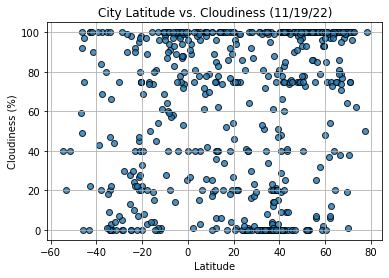

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

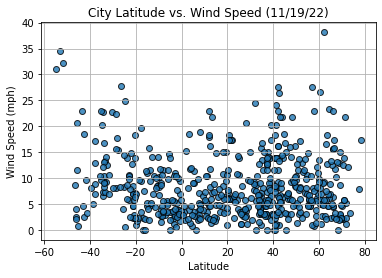

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Clculate the regression line "y-values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates,
                fontsize=15,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    "\n".join(textwrap.wrap(title, 100))
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hilo,19.7297,-155.0900,78.24,89,75,3.44,US,1668882061
6,skjervoy,70.0311,20.9714,24.80,45,1,4.68,NO,1668882063
9,kahului,20.8947,-156.4700,79.84,76,20,18.41,US,1668881883
10,shelbyville,35.4834,-86.4603,46.47,37,0,8.05,US,1668882026
12,sitka,57.0531,-135.3300,46.29,66,100,27.63,US,1668882065


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,64.27,67,20,10.36,ZA,1668881895
2,hithadhoo,-0.6000,73.0833,80.85,79,25,9.37,MV,1668882061
3,esperance,-33.8667,121.9000,57.11,73,47,16.80,AU,1668882062
4,hermanus,-34.4187,19.2345,61.81,75,1,6.49,ZA,1668882062
5,namibe,-15.1961,12.1522,70.99,78,74,11.03,AO,1668881882


###  Temperature vs. Latitude Linear Regression Plot

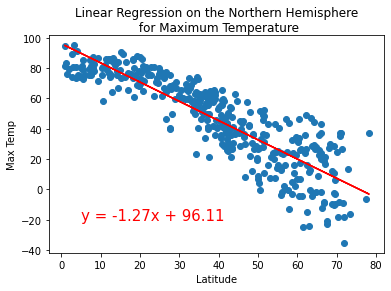

The r-value is: -0.873


In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(5,-20))

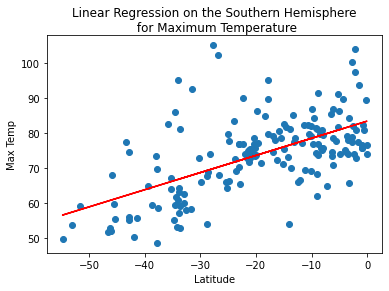

The r-value is: 0.596


In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(-45,45))

**Discussion about the linear relationship:** The Northern Hemisphere has a strong negative regression and the Southern Hemisphere has a week positive regression

### Humidity vs. Latitude Linear Regression Plot

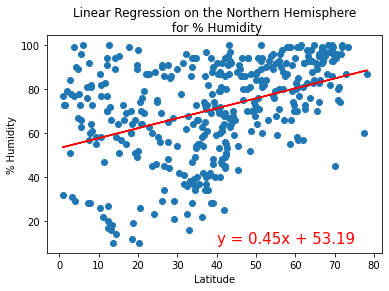

The r-value is: 0.399


In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (40,10))

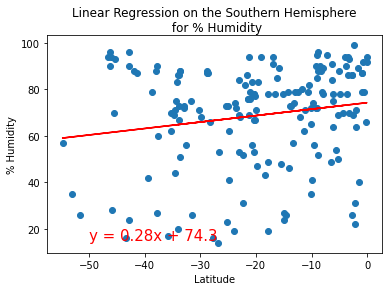

The r-value is: 0.174


In [29]:
# Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity',
                       '% Humidity',
                       (-50,15))

**Discussion about the linear relationship:** The northern hemisphere has a weak positive and the southern hemisphere has no correlation 

### Cloudiness vs. Latitude Linear Regression Plot

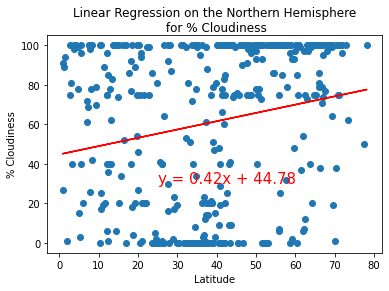

The r-value is: 0.204


In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

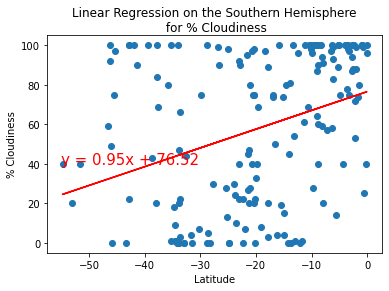

The r-value is: 0.342


In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (-55,40))

**Discussion about the linear relationship:** The northern hemisphere has no correlation and the southern hemisphere has a no correlation 

### Wind Speed vs. Latitude Linear Regression Plot

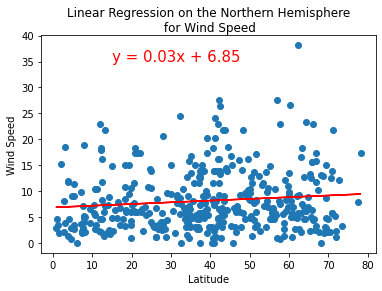

The r-value is: 0.109


In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (15,35))

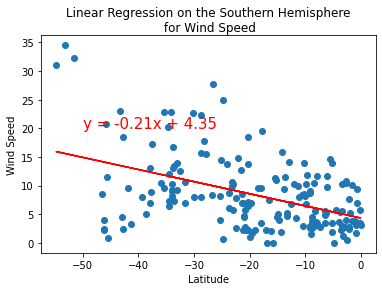

The r-value is: -0.450


In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed',
                       'Wind Speed',
                       (-50,20))

**Discussion about the linear relationship:** The northern hemisphere has a weak positive to no correlation and the southern hemisphere has a week negative to no correlation 